In [1]:
import pink

print(pink.__version__)

2.4.1 revision 26015c0


In [2]:
import numpy as np

images = np.load("data/shapes/boxes.npy").astype(np.float32)
images = np.append(images, np.load("data/shapes/circles.npy").astype(np.float32), axis=0)
images = np.append(images, np.load("data/shapes/crosses.npy").astype(np.float32), axis=0)
images = np.append(images, np.load("data/shapes/triangles.npy").astype(np.float32), axis=0)
np.random.shuffle(images)

images /= np.amax(images)

print('shape:     ', images.shape)
print('min value: ', np.amin(images))
print('max value: ', np.amax(images))

shape:      (4000, 64, 64)
min value:  4.752752e-09
max value:  1.0


In [3]:
import sys
print(sys.version)

3.6.9 (default, Nov  7 2019, 10:44:02) 
[GCC 8.3.0]


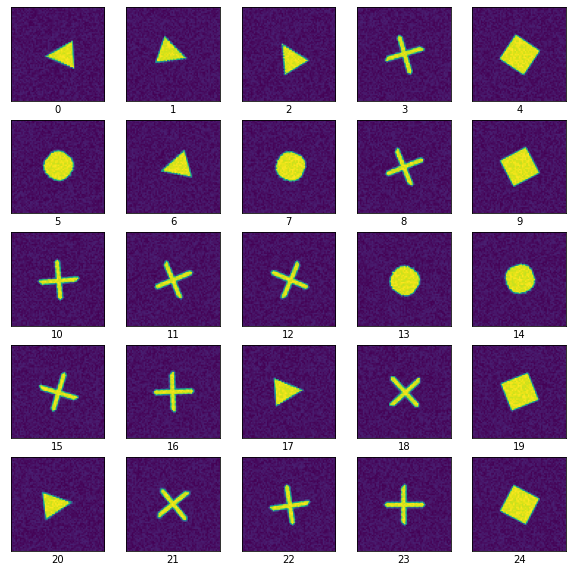

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i])
    plt.xlabel(i)

In [5]:
import math

som_dim = 8
neuron_dim = int(images.shape[1] / math.sqrt(2.0) * 2.0)
euclid_dim = int(images.shape[1] * math.sqrt(2.0) / 2.0)
print("neuron_dim = ", neuron_dim)
print("euclid_dim = ", euclid_dim)

np_som = np.random.rand(som_dim, som_dim, neuron_dim, neuron_dim).astype(np.float32)
som = pink.SOM(np_som)

data = [pink.Data(images[i]) for i in range(len(images))]

trainer = pink.Trainer(som, euclidean_distance_dim=euclid_dim)

neuron_dim =  90
euclid_dim =  45


<IPython.core.display.Javascript object>


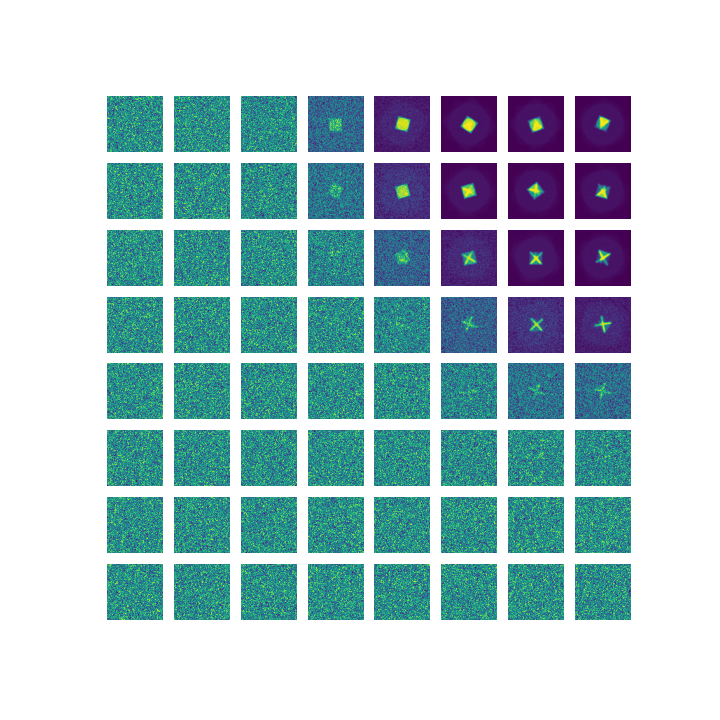

KeyboardInterrupt: 

<IPython.core.display.Javascript object>


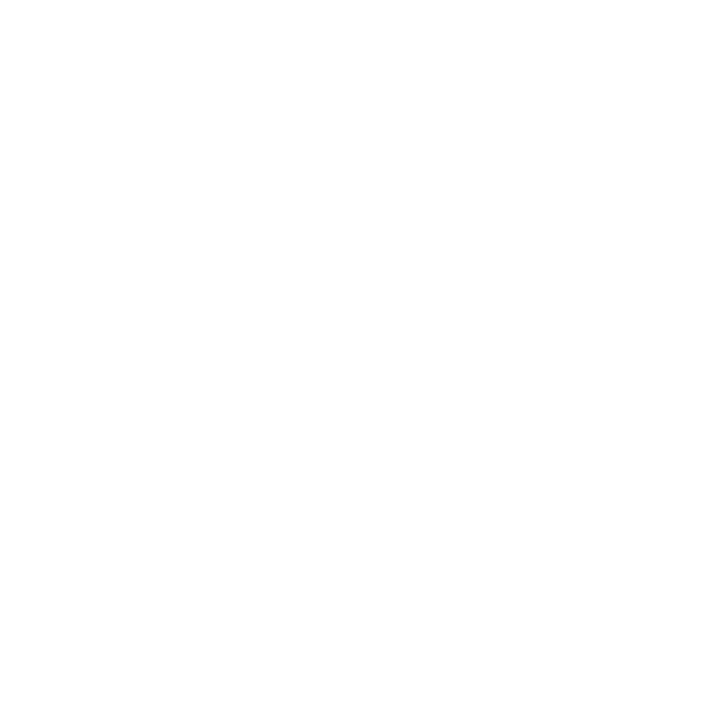

In [6]:
%matplotlib notebook
import tools
import ipywidgets as widgets
from tqdm.notebook import tqdm

widgets.Checkbox(
    value=False,
    description='Interrupt',
    disabled=False
)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
fig.show()

for iter in tqdm(range(1), desc="epoch"):
    for i in tqdm(range(len(images)), desc="train", leave=False):
        
        trainer(data[i])
        
        if not i % 100:
            trainer.update_som()
            
            image = tools.show(som, border=15)

            ax.clear()
            ax.axis("off")
            ax.imshow(image)
            fig.canvas.draw()

In [ ]:
np.save("results/som-shapes-cartesian2d-8x8.npy", np.array(som, copy=True))